In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Data preparation

In [2]:
df = pd.read_csv('laptop_prices.csv')
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [3]:
# converting columns strings
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [4]:
# checking missing values
df.isnull().sum()

company                 0
product                 0
typename                0
inches                  0
ram                     0
os                      0
weight                  0
price_euros             0
screen                  0
screenw                 0
screenh                 0
touchscreen             0
ipspanel                0
retinadisplay           0
cpu_company             0
cpu_freq                0
cpu_model               0
primarystorage          0
secondarystorage        0
primarystoragetype      0
secondarystoragetype    0
gpu_company             0
gpu_model               0
dtype: int64

In [5]:
# checking columns
df.columns

Index(['company', 'product', 'typename', 'inches', 'ram', 'os', 'weight',
       'price_euros', 'screen', 'screenw', 'screenh', 'touchscreen',
       'ipspanel', 'retinadisplay', 'cpu_company', 'cpu_freq', 'cpu_model',
       'primarystorage', 'secondarystorage', 'primarystoragetype',
       'secondarystoragetype', 'gpu_company', 'gpu_model'],
      dtype='object')

### EDA

```
1. company: with significant amount of laptops.
2. unwanted columns: 'product', 'touchscreen', 'ipspanel', 'retinadisplay', 'secondarystorage', 'secondarystoragetype'
3. typename: Consider with significant values.
4. inches & weight: convert it into categories
5. ram, cpu_company, cpu_freq, gpu_company, gpu_model, screen, os : No Changes
6. price_euros: convert it into lkr
7. screenw & screenh: convert it into resolution
8. cpu_model: converting to: i3, i5, i7 or AMD
```

In [6]:
# removing: unwanted columns
df = df.drop(['product', 'touchscreen', 'ipspanel', 'retinadisplay', 'secondarystorage', 'secondarystoragetype'], axis=1)

In [7]:
df.head(2)

,company,typename,inches,ram,os,weight,price_euros,screen,screenw,screenh,cpu_company,cpu_freq,cpu_model,primarystorage,primarystoragetype,gpu_company,gpu_model
0,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,1600,Intel,2.3,Core i5,128,SSD,Intel,Iris Plus Graphics 640
1,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,900,Intel,1.8,Core i5,128,Flash Storage,Intel,HD Graphics 6000


In [8]:
# company
brands = df.company.unique()

In [9]:
laps = 0
for brand in brands:
    print(f'{brand}: {len(df[df.company == brand])}')
    laps += len(df[df.company == brand])

print(f'\ntotal laptops: {laps}')

Apple: 21
HP: 268
Acer: 101
Asus: 152
Dell: 291
Lenovo: 289
Chuwi: 3
MSI: 54
Microsoft: 6
Toshiba: 48
Huawei: 2
Xiaomi: 4
Vero: 4
Razer: 7
Mediacom: 7
Samsung: 9
Google: 3
Fujitsu: 3
LG: 3

total laptops: 1275


In [10]:
#We'll consider the brands which has more the 21 laptops. As, Apple is the min.
df.company.unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [11]:
remv_brands = ['Chuwi', 'MSI', 'Microsoft', 'Huawei', 'Xiaomi', 'Vero', 'Razer','Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG']

In [12]:
df = df[~df['company'].isin(remv_brands)]

In [13]:
df = df.reset_index(drop=True)

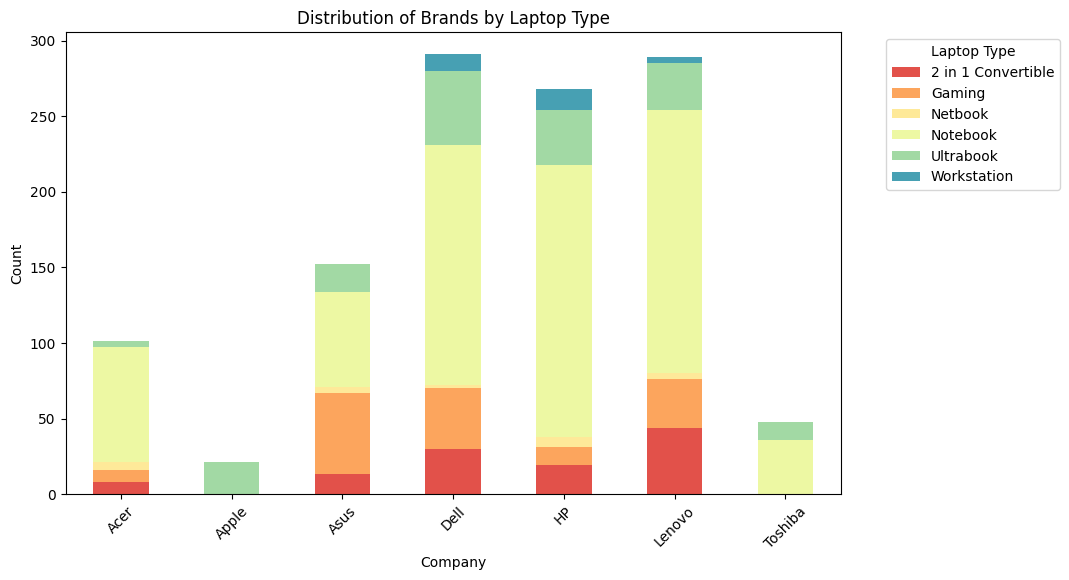

In [14]:
# typename

# Count occurrences of each typenames within each company
count_df = df.groupby(['company', 'typename']).size().unstack(fill_value=0)

# Choose a color palette (e.g., "Set2" for soft, modern colors)
color_palette = sns.color_palette("Spectral", n_colors=len(count_df.columns))

# Plot stacked bar chart with modern colors
count_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=color_palette)

# Customizing the plot
plt.title("Distribution of Brands by Laptop Type")
plt.xlabel("Company")
plt.ylabel("Count")
plt.legend(title="Laptop Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [15]:
# This plot shows that this feature will not be helpful as there is different distributions within the company and typenames.
df = df.drop(['typename'], axis=1)

In [16]:
# inches & weight
df.inches.nunique()

14

In [17]:
print(f'inches: {df.inches.describe()}, \n\nweight: {df.weight.describe()}')

inches: count    1170.000000
mean       15.003077
std         1.401767
min        10.100000
25%        14.000000
50%        15.600000
75%        15.600000
max        17.300000
Name: inches, dtype: float64, 

weight: count    1170.000000
mean        2.035634
std         0.649615
min         0.690000
25%         1.540000
50%         2.040000
75%         2.300000
max         4.700000
Name: weight, dtype: float64


In [18]:
def category(inches, weight):
    if inches <= 14 and weight <= 1.54:
        return 'portable'
    elif inches > 15.6 and weight > 2.3:
        return 'heavy duty'
    elif inches > 14 and inches <= 15.6 and weight > 1.54 and weight <= 2.3:
        return 'standard'
    else:
        return 'Other'

In [19]:
# Apply the function to create a new column
df['category'] = df.apply(lambda row: category(row['inches'], row['weight']), axis=1)

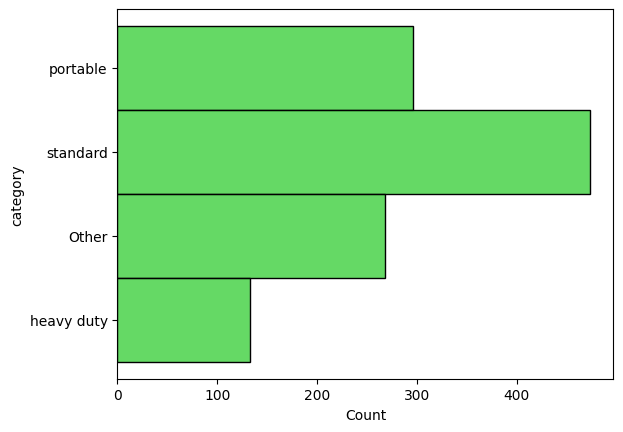

In [20]:
sns.histplot(data=df, y='category', color='limegreen');

In [21]:
# removing inches and weight columns
df = df.drop(['inches', 'weight'], axis=1)

In [22]:
# os
df.os.unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [23]:
for os in list(df.os.unique()):
    print(f'{os}: {len(df[df.os == os])}')

macOS: 13
No OS: 63
Windows 10: 957
Mac OS X: 8
Linux: 58
Android: 2
Windows 10 S: 2
Chrome OS: 22
Windows 7: 45


In [24]:
#We can have major three OS: Windows, Mac, Other
def OS(os):
    if 'Windows' in os:
        return 'windows'
    elif 'Mac' in os or 'mac' in os:
        return 'mac'
    else:
        return 'other'

In [25]:
df['OS'] = df['os'].apply(OS)

In [26]:
df = df.drop('os', axis=1)

In [27]:
df.head(3)

,company,ram,price_euros,screen,screenw,screenh,cpu_company,cpu_freq,cpu_model,primarystorage,primarystoragetype,gpu_company,gpu_model,category,OS
0,Apple,8,1339.69,Standard,2560,1600,Intel,2.3,Core i5,128,SSD,Intel,Iris Plus Graphics 640,portable,mac
1,Apple,8,898.94,Standard,1440,900,Intel,1.8,Core i5,128,Flash Storage,Intel,HD Graphics 6000,portable,mac
2,HP,8,575.00,Full HD,1920,1080,Intel,2.5,Core i5 7200U,256,SSD,Intel,HD Graphics 620,standard,other


In [28]:
# screen, screenw, screenh
df.screen.unique()

array(['Standard', 'Full HD', 'Quad HD+', '4K Ultra HD'], dtype=object)

In [29]:
for screen in list(df.screen.unique()):
    print(f'{screen}: {len(df[df.screen == screen])}')

Standard: 352
Full HD: 753
Quad HD+: 28
4K Ultra HD: 37


In [30]:
print(f'w: {df.screenw.describe()} \n\nh: {df.screenh.describe()}')

w: count    1170.000000
mean     1886.302564
std       492.219742
min      1366.000000
25%      1600.000000
50%      1920.000000
75%      1920.000000
max      3840.000000
Name: screenw, dtype: float64 

h: count    1170.000000
mean     1063.846154
std       280.445284
min       768.000000
25%       900.000000
50%      1080.000000
75%      1080.000000
max      2160.000000
Name: screenh, dtype: float64


In [31]:
df['res'] = df['screenw'] * df['screenh']

In [32]:
def resolution(res):
    if res < 1920*1080:
        return 'HD'
    elif 1920*1080 <= res < 2560*1440:
        return 'FullHD'
    elif 2560*1440 <= res < 3840*2160:
        return 'QuadHD'
    elif 3840*2160 <= res < 7680*2160:
        return 'UltraHD'
    else:
        return '8K'

In [33]:
df['resolution'] = df['res'].apply(resolution)

In [34]:
df = df.drop(['screen', 'screenw', 'screenh', 'res'], axis=1)

In [35]:
df.cpu_company.unique()

array(['Intel', 'AMD'], dtype=object)

In [36]:
for cpu in list(df.cpu_company.unique()):
    print(f'{cpu}: {len(df[df.cpu_company == cpu])/len(df.cpu_company)*100}')

Intel: 94.87179487179486
AMD: 5.128205128205128


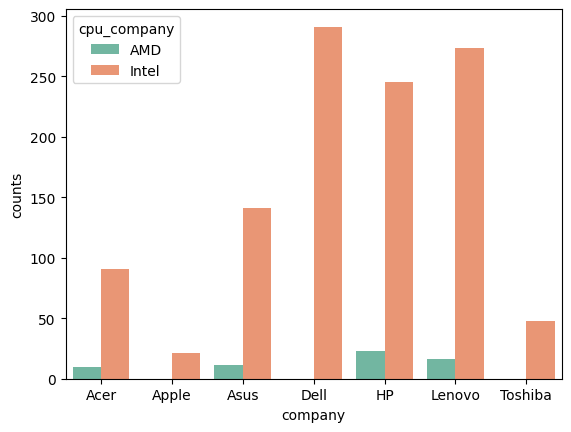

In [37]:
counts = df.groupby(['company', 'cpu_company']).size().reset_index(name='counts')

sns.barplot(data=counts, x='company', y='counts', hue='cpu_company', palette='Set2');

In [38]:
# processor category
def processor_category(model):
    if 'i3' in model:
        return 'i3'
    elif 'i5' in model:
        return 'i5'
    elif 'i7' in model:
        return 'i7'
    else:
        return 'AMD'

In [39]:
df['gen'] = df['cpu_model'].apply(processor_category)

for gen in list(df.gen.unique()):
    print(f'{gen}: {len(df[df.gen == gen])}')

i5: 405
i7: 445
AMD: 186
i3: 134


In [40]:
# gpu
df.gpu_model.nunique()

107

In [41]:
for gpu in list(df.gpu_model.unique()):
    print(f'{gpu}: {len(df[df.gpu_model == gpu])}')

Iris Plus Graphics 640: 5
HD Graphics 6000: 5
HD Graphics 620: 265
Radeon Pro 455: 1
Iris Plus Graphics 650: 2
Radeon R5: 11
Iris Pro Graphics: 1
GeForce MX150: 12
UHD Graphics 620: 68
HD Graphics 520: 179
Radeon Pro 555: 1
Radeon R5 M430: 20
HD Graphics 615: 10
Radeon Pro 560: 1
GeForce 940MX: 41
HD Graphics 400: 29
GeForce GTX 1050: 53
Radeon R2: 5
Radeon 530: 41
GeForce 930MX: 20
HD Graphics 500: 33
GeForce 930MX : 5
GeForce GTX 1060: 31
GeForce 150MX: 3
Iris Graphics 540: 2
Radeon RX 580: 5
GeForce 920MX: 13
Radeon R4 Graphics: 5
Radeon 520: 17
GeForce GTX 1050 Ti: 21
GeForce MX130: 6
R4 Graphics: 1
GeForce GTX 940MX: 4
Radeon RX 560: 1
GeForce 920M: 4
Radeon R7 M445: 14
Radeon RX 550: 4
GeForce GTX 1050M: 3
HD Graphics 515: 13
Radeon R5 M420: 8
HD Graphics 505: 12
R17M-M1-70: 1
Quadro M1200: 9
GeForce 920MX : 5
GeForce GTX 950M: 7
FirePro W4190M : 2
GeForce GTX 1080: 4
GeForce GTX 980M: 7
Iris Graphics 550: 1
GeForce 930M: 6
HD Graphics 630: 4
HD Graphics: 18
Radeon R5 430: 1
GeFo

In [42]:
# removing gpu_brand, cpu_model as gpu have more values;
df = df.drop(['gpu_model', 'cpu_model'], axis=1)

In [43]:
df.head()

,company,ram,price_euros,cpu_company,cpu_freq,primarystorage,primarystoragetype,gpu_company,category,OS,resolution,gen
0,Apple,8,1339.69,Intel,2.3,128,SSD,Intel,portable,mac,QuadHD,i5
1,Apple,8,898.94,Intel,1.8,128,Flash Storage,Intel,portable,mac,HD,i5
2,HP,8,575.00,Intel,2.5,256,SSD,Intel,standard,other,FullHD,i5
3,Apple,16,2537.45,Intel,2.7,512,SSD,AMD,standard,mac,QuadHD,i7
4,Apple,8,1803.60,Intel,3.1,256,SSD,Intel,portable,mac,QuadHD,i5


In [44]:
# primary storage type
df.primarystoragetype.unique()

array(['SSD', 'Flash Storage', 'HDD', 'Hybrid'], dtype=object)

In [45]:
for storage in list(df.primarystoragetype.unique()):
    print(f'{storage}: {len(df[df.primarystoragetype == storage])}')

SSD: 746
Flash Storage: 60
HDD: 356
Hybrid: 8


In [46]:
df.cpu_company.unique()

array(['Intel', 'AMD'], dtype=object)

In [47]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['company',
 'cpu_company',
 'primarystoragetype',
 'gpu_company',
 'category',
 'OS',
 'resolution',
 'gen']

In [48]:
df[strings] = df[strings].apply(lambda x: x.str.lower().str.replace(' ', '_'))
df.columns = df.columns.str.lower()

In [49]:
# converting euros to lkr
df['price_lkr'] = round(df['price_euros']*307.15/3, 2)
df = df.drop('price_euros', axis=1)

In [50]:
df.head()

,company,ram,cpu_company,cpu_freq,primarystorage,primarystoragetype,gpu_company,category,os,resolution,gen,price_lkr
0,apple,8,intel,2.3,128,ssd,intel,portable,mac,quadhd,i5,137161.93
1,apple,8,intel,1.8,128,flash_storage,intel,portable,mac,hd,i5,92036.47
2,hp,8,intel,2.5,256,ssd,intel,standard,other,fullhd,i5,58870.42
3,apple,16,intel,2.7,512,ssd,amd,standard,mac,quadhd,i7,259792.59
4,apple,8,intel,3.1,256,ssd,intel,portable,mac,quadhd,i5,184658.58


In [51]:
round(df.price_lkr.describe(),2)

count      1170.00
mean     112283.03
std       67838.22
min       17814.70
25%       61248.27
50%       97161.78
75%      145130.94
max      501575.95
Name: price_lkr, dtype: float64

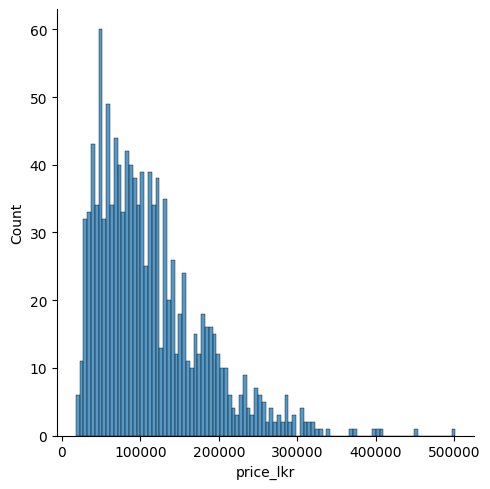

In [52]:
sns.displot(data=df, x='price_lkr', bins=100)

In [53]:
# converting prices
price_logs = np.log1p(df.price_lkr)
price_logs

0       11.828925
1       11.429951
2       10.983111
3       12.467643
4       12.126269
          ...    
1165    11.087078
1166    11.941284
1167    10.062488
1168    11.267305
1169    10.539547
Name: price_lkr, Length: 1170, dtype: float64

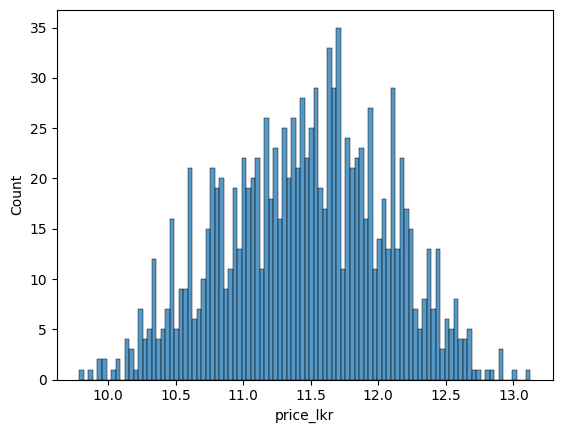

In [54]:
sns.histplot(price_logs, bins=100);

In [55]:
price_logs.describe()

count    1170.000000
mean       11.454537
std         0.601406
min         9.787835
25%        11.022707
50%        11.484143
75%        11.885397
max        13.125512
Name: price_lkr, dtype: float64

### Model Validation

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [58]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [59]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [60]:
y_train = np.log1p(df_train.price_lkr.values)
y_val = np.log1p(df_val.price_lkr.values)
y_test = np.log1p(df_test.price_lkr.values)

In [61]:
del df_train['price_lkr']
del df_val['price_lkr']
del df_test['price_lkr']

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170 entries, 0 to 1169
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   company             1170 non-null   object 
 1   ram                 1170 non-null   int64  
 2   cpu_company         1170 non-null   object 
 3   cpu_freq            1170 non-null   float64
 4   primarystorage      1170 non-null   int64  
 5   primarystoragetype  1170 non-null   object 
 6   gpu_company         1170 non-null   object 
 7   category            1170 non-null   object 
 8   os                  1170 non-null   object 
 9   resolution          1170 non-null   object 
 10  gen                 1170 non-null   object 
 11  price_lkr           1170 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 109.8+ KB


In [63]:
numerical = ['ram', 'cpu_freq', 'primarystorage']

categorical = [
    'company',
    'cpu_company',
    'primarystoragetype',
    'gpu_company',
    'category',
    'os',
    'resolution',
    'gen'
]

#### One-Hot Encoding

In [64]:
from sklearn.feature_extraction import DictVectorizer

In [65]:
dv = DictVectorizer(sparse=False)

In [66]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [67]:
# rmse
def rmse(y, y_pred):
    error = y-y_pred
    sr = error ** 2
    mse = sr.mean()
    return np.sqrt(mse)

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [69]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

#### DecisionTreeRegressor Parameter Tuning

In [70]:
depths = [1, 2, 3, 4, 5, 10, 100, None]
min_samples_splits = [2, 4, 8, 10, 20, 50]
for depth in depths:
    for min_samples_split in min_samples_splits:
        model2 = DecisionTreeRegressor(max_depth=depth, min_samples_split=min_samples_split)
        model2.fit(X_train, y_train)
        y_pred_2 = model2.predict(X_val)
        print(f'depth: {depth}, min_samples_split: {min_samples_split}, rmse: {round(rmse(y_val, y_pred_2),3)}')


depth: 1, min_samples_split: 2, rmse: 0.462
depth: 1, min_samples_split: 4, rmse: 0.462
depth: 1, min_samples_split: 8, rmse: 0.462
depth: 1, min_samples_split: 10, rmse: 0.462
depth: 1, min_samples_split: 20, rmse: 0.462
depth: 1, min_samples_split: 50, rmse: 0.462
depth: 2, min_samples_split: 2, rmse: 0.375
depth: 2, min_samples_split: 4, rmse: 0.375
depth: 2, min_samples_split: 8, rmse: 0.375
depth: 2, min_samples_split: 10, rmse: 0.375
depth: 2, min_samples_split: 20, rmse: 0.375
depth: 2, min_samples_split: 50, rmse: 0.375
depth: 3, min_samples_split: 2, rmse: 0.337
depth: 3, min_samples_split: 4, rmse: 0.337
depth: 3, min_samples_split: 8, rmse: 0.337
depth: 3, min_samples_split: 10, rmse: 0.337
depth: 3, min_samples_split: 20, rmse: 0.337
depth: 3, min_samples_split: 50, rmse: 0.337
depth: 4, min_samples_split: 2, rmse: 0.292
depth: 4, min_samples_split: 4, rmse: 0.292
depth: 4, min_samples_split: 8, rmse: 0.292
depth: 4, min_samples_split: 10, rmse: 0.292
depth: 4, min_samples_

#### RandomForestRegressor Parameter Tuning

In [71]:
estimators = [100, 200, 300, 400, 500]
depths = [1, 2, 3, 4, 5, 10, 100, None]
min_samples_splits = [2, 4, 8, 10, 20, 50]
for depth in depths:
    for min_samples_split in min_samples_splits:
        for estimator in estimators:
            model3 = RandomForestRegressor(n_estimators=estimator, max_depth=depth, min_samples_split=min_samples_split)
            model3.fit(X_train, y_train)
            y_pred_3 = model3.predict(X_val)
            print(f'n_estimators: {estimator}, depth: {depth}, min_samples_split: {min_samples_split}, rmse: {round(rmse(y_val, y_pred_3),3)}')



n_estimators: 100, depth: 1, min_samples_split: 2, rmse: 0.462
n_estimators: 200, depth: 1, min_samples_split: 2, rmse: 0.462
n_estimators: 300, depth: 1, min_samples_split: 2, rmse: 0.462
n_estimators: 400, depth: 1, min_samples_split: 2, rmse: 0.462
n_estimators: 500, depth: 1, min_samples_split: 2, rmse: 0.462
n_estimators: 100, depth: 1, min_samples_split: 4, rmse: 0.462
n_estimators: 200, depth: 1, min_samples_split: 4, rmse: 0.462
n_estimators: 300, depth: 1, min_samples_split: 4, rmse: 0.462
n_estimators: 400, depth: 1, min_samples_split: 4, rmse: 0.462
n_estimators: 500, depth: 1, min_samples_split: 4, rmse: 0.462
n_estimators: 100, depth: 1, min_samples_split: 8, rmse: 0.462
n_estimators: 200, depth: 1, min_samples_split: 8, rmse: 0.462
n_estimators: 300, depth: 1, min_samples_split: 8, rmse: 0.462
n_estimators: 400, depth: 1, min_samples_split: 8, rmse: 0.462
n_estimators: 500, depth: 1, min_samples_split: 8, rmse: 0.462
n_estimators: 100, depth: 1, min_samples_split: 10, rms

In [72]:
# depth: 10, min_samples_splits: 10
model2 = DecisionTreeRegressor(max_depth=10, min_samples_split=10)
model2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10)

In [73]:
# n_estimator=300, depth=10, min_samples_splits=4
model3 = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=4)
model3.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=4, n_estimators=300)

In [74]:
#finalized model
y_pred_1 = model1.predict(X_val)
y_pred_2 = model2.predict(X_val)
y_pred_3 = model3.predict(X_val)

In [75]:
rmse(y_val, y_pred_1)

0.28212880542402613

In [76]:
rmse(y_val, y_pred_2)

0.2588127075658585

In [77]:
rmse(y_val, y_pred_3)

0.22301526563846025

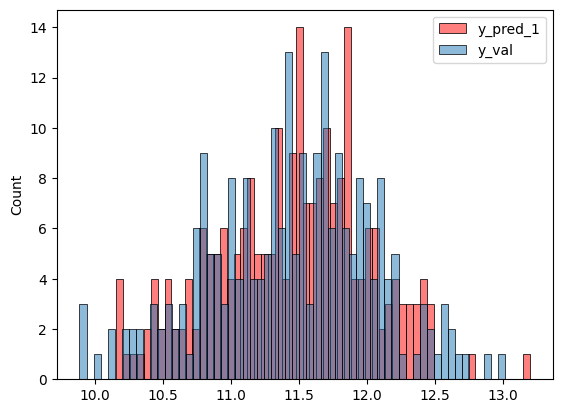

In [78]:
sns.histplot(y_pred_1, color='red', bins=60, alpha=0.5, label='y_pred_1')
sns.histplot(y_val, bins=60, alpha=0.5, label='y_val')
plt.legend()
plt.show()

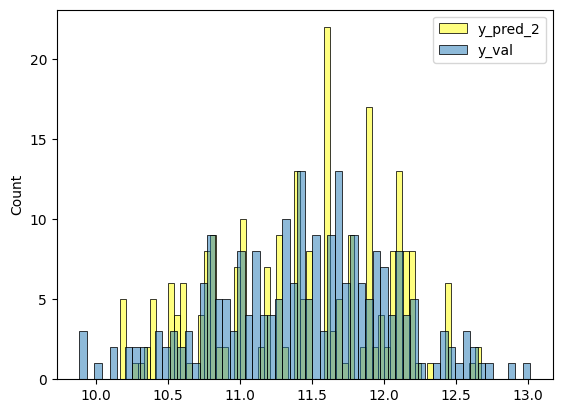

In [79]:
sns.histplot(y_pred_2, color='yellow', bins=60, alpha=0.5, label='y_pred_2')
sns.histplot(y_val, bins=60, alpha=0.5, label='y_val')
plt.legend()
plt.show()

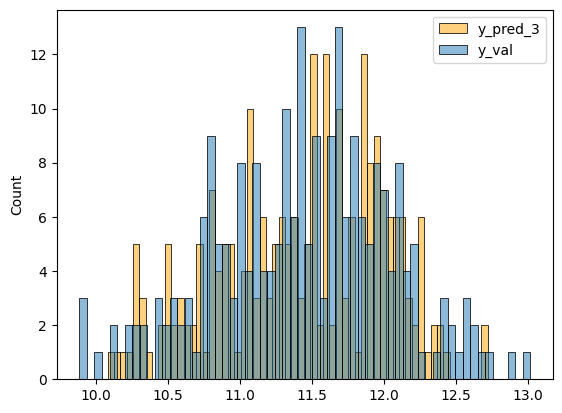

In [80]:
sns.histplot(y_pred_3, color='orange', bins=60, alpha=0.5, label='y_pred_3')
sns.histplot(y_val, bins=60, alpha=0.5, label='y_val')
plt.legend()
plt.show()

In [81]:
def train(df_train, y_train, n_estimators=300, max_depth=10, min_samples_split=4):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split)
    model.fit(X_train, y_train)

    return dv, model

In [82]:
dv, model = train(df_train, y_train, n_estimators=300, max_depth=10, min_samples_split=4)

In [83]:
dv

DictVectorizer(sparse=False)

In [84]:
model

RandomForestRegressor(max_depth=10, min_samples_split=4, n_estimators=300)

In [85]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict(X)

    return y_pred

In [86]:
y_pred = predict(df_val, dv, model)

In [87]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score

In [88]:
n_splits = [2, 3, 4, 5, 10, 20]

In [89]:
for n_split in n_splits:
    Kfold = KFold(n_splits=n_split, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in Kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = np.log1p(df_train.price_lkr.values)
        y_val = np.log1p(df_val.price_lkr.values)

        dv, model = train(df_train, y_train, n_estimators=300, max_depth=10, min_samples_split=4)
        y_pred = predict(df_val, dv, model)

        auc = rmse(y_val, y_pred)
        scores.append(auc)

    print('%s %.3f +- %.3f' % (n_split, np.mean(scores), np.std(scores)))

2 0.240 +- 0.009
3 0.234 +- 0.015
4 0.233 +- 0.020
5 0.223 +- 0.019
10 0.220 +- 0.019
20 0.221 +- 0.027


In [90]:
# n_splits == 10; 

In [91]:
df_test

,company,ram,cpu_company,cpu_freq,primarystorage,primarystoragetype,gpu_company,category,os,resolution,gen
0,acer,16,intel,2.5,256,ssd,nvidia,other,windows,fullhd,i5
1,asus,4,amd,2.5,128,ssd,amd,standard,windows,fullhd,amd
2,lenovo,8,intel,2.5,256,ssd,intel,portable,windows,fullhd,i5
3,hp,8,intel,2.4,256,ssd,intel,standard,windows,fullhd,i5
4,lenovo,8,intel,2.5,256,ssd,nvidia,other,other,fullhd,i5
...,...,...,...,...,...,...,...,...,...,...,...
229,dell,12,intel,1.6,1024,hdd,nvidia,heavy_duty,windows,fullhd,i5
230,lenovo,4,intel,2.0,128,ssd,intel,standard,windows,hd,i3
231,acer,16,intel,2.8,256,ssd,nvidia,heavy_duty,windows,fullhd,i7
232,asus,4,intel,1.1,32,flash_storage,intel,portable,windows,hd,amd


In [92]:
dv, model = train(df_full_train, np.log1p(df_full_train.price_lkr.values), n_estimators=300, max_depth=10, min_samples_split=4)
y_pred = predict(df_test, dv, model)
rmse_value = rmse(y_test, y_pred)
rmse_value

0.24940293353862308